In [5]:
import pandas as pd

# Replace 'your_file.csv' with the path to your CSV file
file_path = 'Steel_industry.csv'

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

In [6]:
df.head()

,Date_Time,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_Of_Week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


In [7]:
df.shape

(35041, 11)

In [8]:
df.isna().sum()

Date_Time                               0
Usage_kWh                               0
Lagging_Current_Reactive.Power_kVarh    0
Leading_Current_Reactive_Power_kVarh    0
CO2(tCO2)                               0
Lagging_Current_Power_Factor            0
Leading_Current_Power_Factor            0
NSM                                     0
WeekStatus                              0
Day_Of_Week                             0
Load_Type                               0
dtype: int64

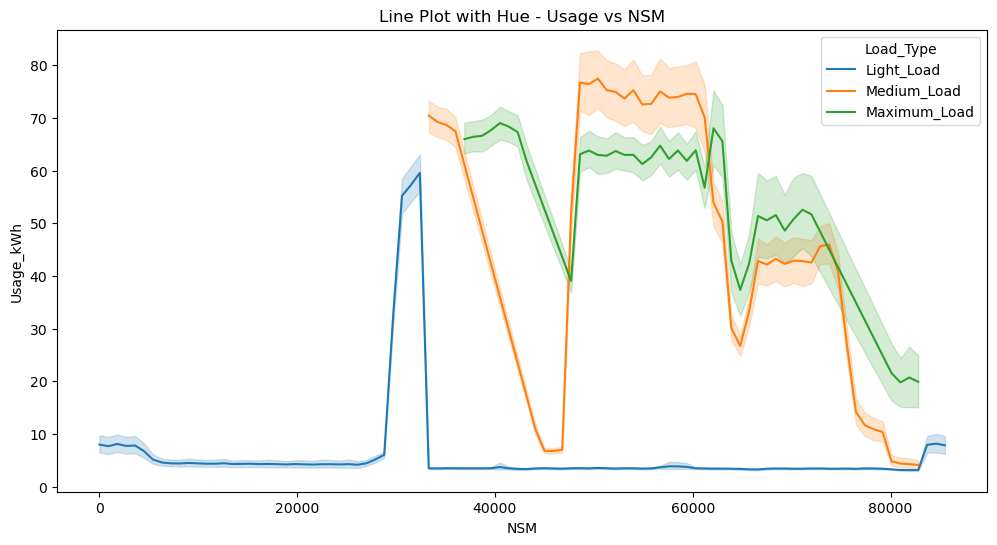

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization 1: Line plot with hue
plt.figure(figsize=(12, 6))
sns.lineplot(x="NSM", y="Usage_kWh", hue="Load_Type", data=df)
plt.title("Line Plot with Hue - Usage vs NSM")
plt.show()

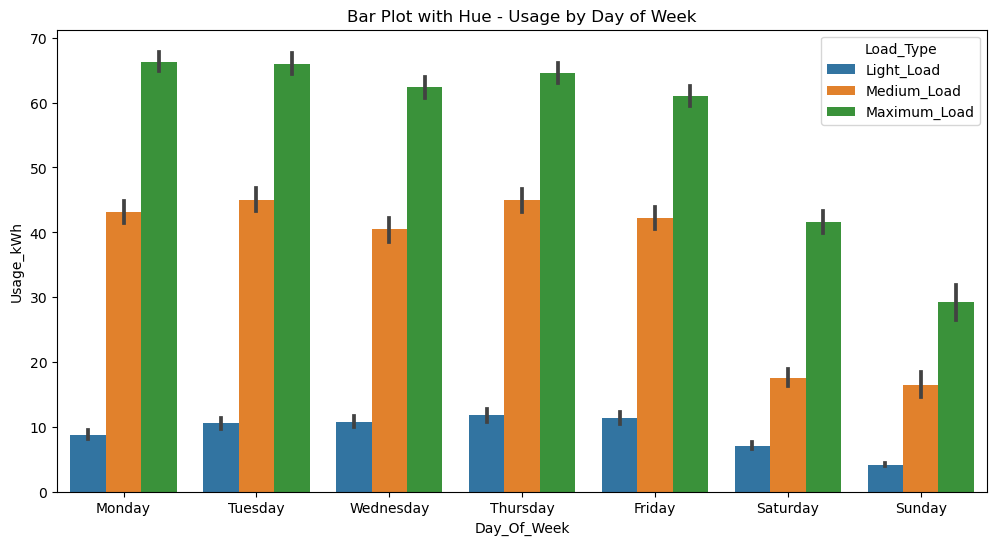

In [10]:
# Visualization 2: Bar plot with hue
plt.figure(figsize=(12, 6))
sns.barplot(x="Day_Of_Week", y="Usage_kWh", hue="Load_Type", data=df)
plt.title("Bar Plot with Hue - Usage by Day of Week")
plt.show()

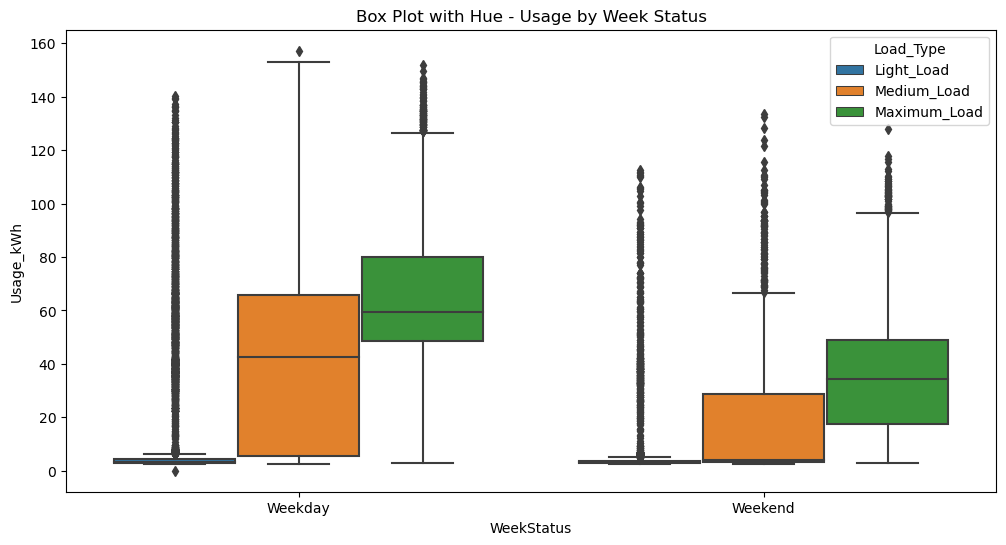

In [11]:
# Visualization 3: Box plot with hue
plt.figure(figsize=(12, 6))
sns.boxplot(x="WeekStatus", y="Usage_kWh", hue="Load_Type", data=df)
plt.title("Box Plot with Hue - Usage by Week Status")
plt.show()

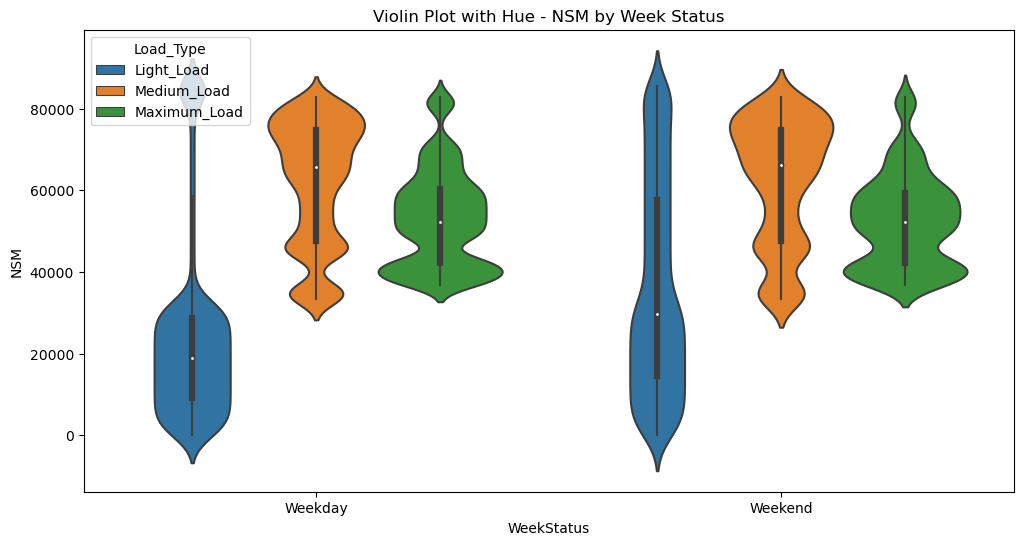

In [12]:
# Visualization 4: Violin plot with hue
plt.figure(figsize=(12, 6))
sns.violinplot(x="WeekStatus", y="NSM", hue="Load_Type", data=df)
plt.title("Violin Plot with Hue - NSM by Week Status")
plt.show()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35041 entries, 0 to 35040
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Date_Time                             35041 non-null  object 
 1   Usage_kWh                             35041 non-null  float64
 2   Lagging_Current_Reactive.Power_kVarh  35041 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  35041 non-null  float64
 4   CO2(tCO2)                             35041 non-null  float64
 5   Lagging_Current_Power_Factor          35041 non-null  float64
 6   Leading_Current_Power_Factor          35041 non-null  float64
 7   NSM                                   35041 non-null  int64  
 8   WeekStatus                            35041 non-null  object 
 9   Day_Of_Week                           35041 non-null  object 
 10  Load_Type                             35041 non-null  object 
dtypes: float64(6), 

In [14]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Create an instance of LabelEncoder
encoder = LabelEncoder()

# Iterate over object columns and encode them
for column in df.select_dtypes(include=['object']):
    df[column] = encoder.fit_transform(df[column])

In [23]:
df['Load_Type'].unique()

array([0, 2, 1])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35041 entries, 0 to 35040
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Date_Time                             35041 non-null  int32  
 1   Usage_kWh                             35041 non-null  float64
 2   Lagging_Current_Reactive.Power_kVarh  35041 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  35041 non-null  float64
 4   CO2(tCO2)                             35041 non-null  float64
 5   Lagging_Current_Power_Factor          35041 non-null  float64
 6   Leading_Current_Power_Factor          35041 non-null  float64
 7   NSM                                   35041 non-null  int64  
 8   WeekStatus                            35041 non-null  int32  
 9   Day_Of_Week                           35041 non-null  int32  
 10  Load_Type                             35041 non-null  int32  
dtypes: float64(6), 

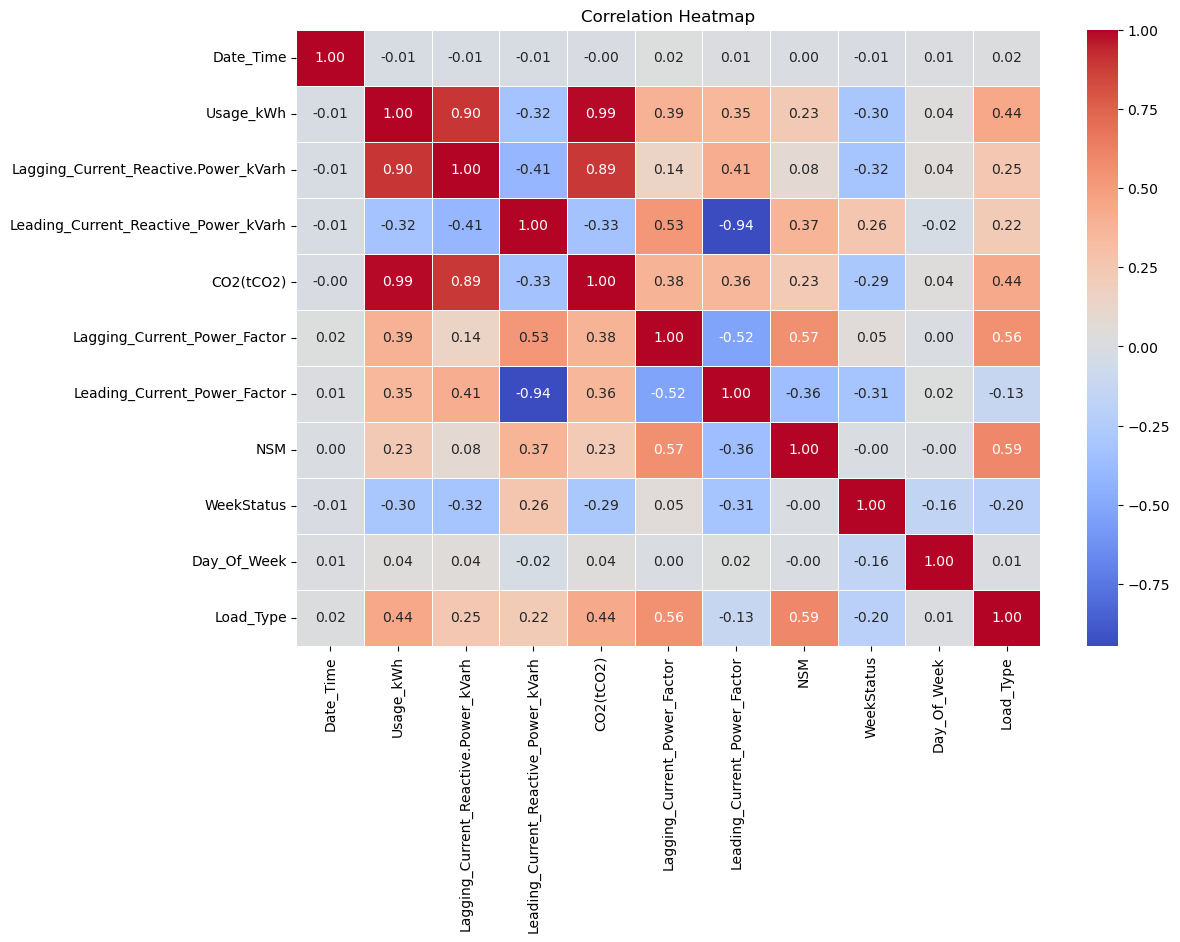

In [17]:
# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Features and target variable
X = df.drop(['Load_Type', 'Date_Time'], axis=1)
y = df['Load_Type']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      3574
           1       0.80      0.79      0.79      1499
           2       0.80      0.82      0.81      1936

    accuracy                           0.89      7009
   macro avg       0.86      0.86      0.86      7009
weighted avg       0.89      0.89      0.89      7009

Confusion Matrix:
[[3471   22   81]
 [  18 1178  303]
 [  77  281 1578]]


In [19]:
from sklearn.ensemble import RandomForestClassifier


# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_classifier.predict(X_test)

# Classification report
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion matrix
print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3574
           1       0.82      0.84      0.83      1499
           2       0.85      0.83      0.84      1936

    accuracy                           0.91      7009
   macro avg       0.88      0.88      0.88      7009
weighted avg       0.91      0.91      0.91      7009

Random Forest Confusion Matrix:
[[3503   10   61]
 [  14 1252  233]
 [  72  259 1605]]


In [20]:
from sklearn.ensemble import GradientBoostingClassifier

# Create a Gradient Boosting classifier
gb_clf = GradientBoostingClassifier(random_state=42)

# Train the classifier
gb_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_gb = gb_clf.predict(X_test)

# Classification report
print("\nGradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_gb))

# Confusion matrix
print("Gradient Boosting Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_gb))


Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      3574
           1       0.80      0.82      0.81      1499
           2       0.81      0.80      0.81      1936

    accuracy                           0.89      7009
   macro avg       0.86      0.86      0.86      7009
weighted avg       0.89      0.89      0.89      7009

Gradient Boosting Confusion Matrix:
[[3459   15  100]
 [  12 1229  258]
 [  89  296 1551]]
